# 4. Scipy로 공부하는 확률 변수

## 01장. 이산 확률 분포

## 4. 다항 분포

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

In [2]:
mpl.rcParams["font.family"]
mpl.matplotlib_fname()
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


- - -
### 1. 다항 분포 (Multinomial Distribution)

- 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포를 이룬다.

- 카테고리 값이 나올 확률이 theta인 독립적인 카테고리 시도를 N번 반복해서 k가 각각 x_{k}번 나올 확률분포를 뜻함

In [4]:
%%latex
$Mu(x;N,\theta)$

<IPython.core.display.Latex object>

- - -
### 2. 다항분포의 모멘트

In [9]:
%%latex
기댓값 : $E[x_{k}=N\theta_{k}]$, 분산 : $Var[x_{k}]=N\theta_{k}(1-\theta_{k})$

<IPython.core.display.Latex object>

- - -
### 3. Scipy를 이용한 다항 분포의 시뮬레이션

In [16]:
# 각 카테고리 값이 선택 될 확률이 theta인 카테고리 시도를 n번 30번 하는 다항 분포의 객체를 생성한다.
# 1세트에 30번 시도하고 그게 샘플 하나이다. N값으로 넣어줌
N = 30
theta = [0, 0, 0.1, 0.2, 0.3, 0.4]
rv = sp.stats.multinomial(N, theta)

In [11]:
# 객체 생성 후 직접 샘플링 해본다.
np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

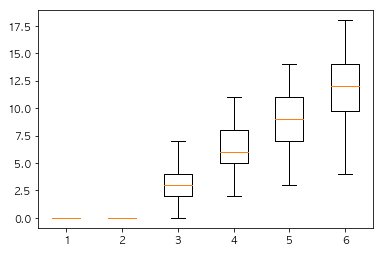

In [12]:
# 샘플링 한 값을 박스플롯으로 나타낸다.
plt.boxplot(X)
plt.show()

In [17]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]

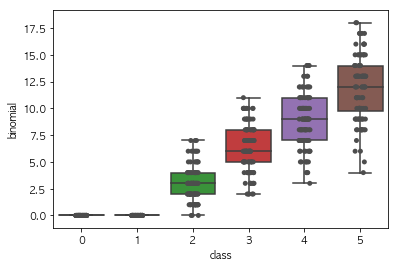

In [18]:
# jitter = True 하면 discrete한 애들이라서 한줄에 많이 찍힌 것을 흔들어 준다.

sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()

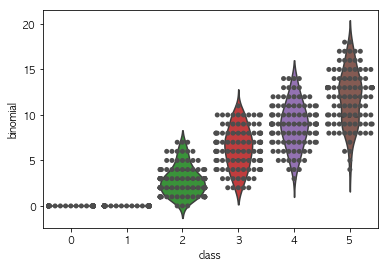

In [19]:
# histogram 모양을 바이올린 플롯으로 나타냄

sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.swarmplot(x="class", y="binomial", data=df, color=".3")
plt.show()

In [21]:
# 앞의 시각화와 좀 다르다. 1이 나온 횟수는 얼마인지 알려줬다면
# 다항 분포 3이 몇번 나오는지의 답이 분포가 되어서 히스토그램으로 그려줘야한다.

# 각 열벡터를 히스토그램으로 그리면 된다.
# 다항 분포의 기댓값을 가지고 계산한다. 3이 나올 확률이 0.1 이였으니까

# 히스토그램 여섯 개 나와서 boxplot 1~6이 몇번 나오는지 한번에 알려준다.